In [112]:
#%%writefile model.py
import pandas as pd
from pycaret.classification import *
df = pd.read_csv("Data/Pulp Sensibility Data.csv")
df.head()
s = setup(data = df, target = 'Need_Suppliment', session_id=123)
best_model = compare_models(sort="F1")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:40:56
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [113]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:04:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9444,1.0000,0.8571,0.9231,0.7273,0.7559
1,0.7778,1.0000,1.0000,0.7500,0.8571,0.4000,0.5000
2,0.7778,0.9444,0.8333,0.8333,0.8333,0.5000,0.5000
3,0.7778,0.8889,0.6667,1.0000,0.8000,0.5714,0.6325
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.6667,0.6667,0.8000,0.7273,0.3077,0.3162
6,0.5556,0.7778,0.8333,0.6250,0.7143,-0.2000,-0.2500
7,0.4444,0.3889,0.5000,0.6000,0.5455,-0.1538,-0.1581
8,0.6250,0.6667,0.6000,0.7500,0.6667,0.2500,0.2582


Fitting 10 folds for each of 10 candidates, totalling 100 fits


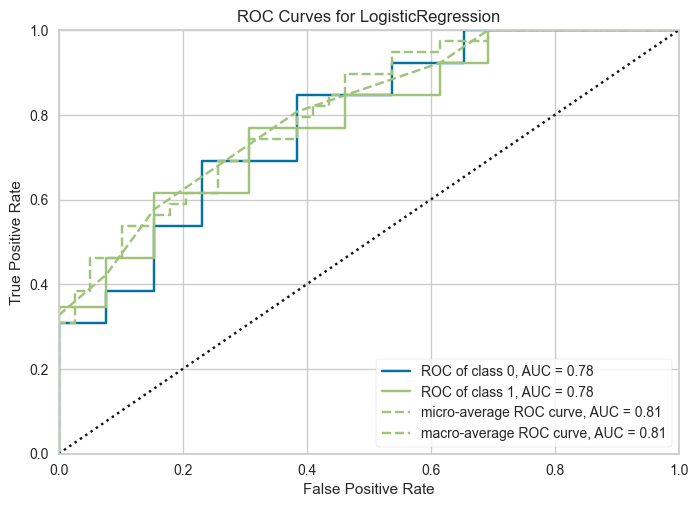

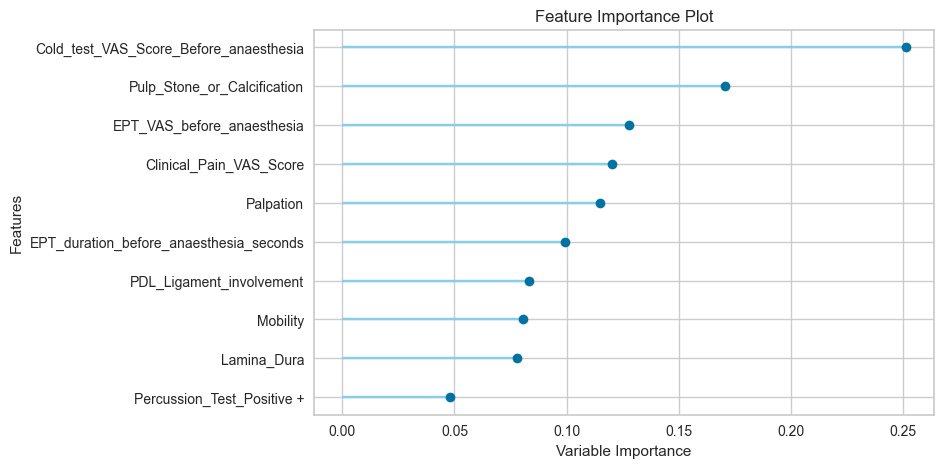

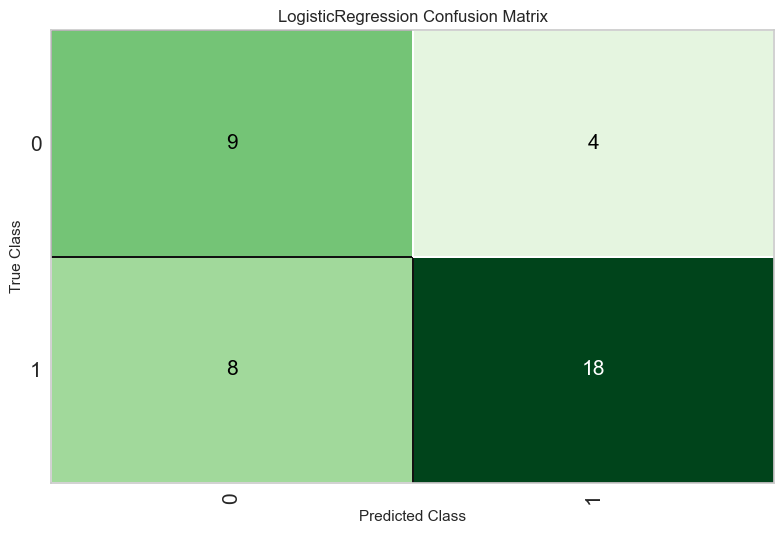

In [114]:
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize = 'F1')
plot_model(tuned_lr, plot = 'auc')
plot_model(tuned_lr, plot='feature')
plot_model(tuned_lr, plot = 'confusion_matrix')

In [115]:
final_lr = finalize_model(tuned_lr)
save_model(final_lr,'Final_Model_lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Patient_Age',
                                              'Pain_Duration_Days',
                                              'EPT_duration_before_anaesthesia_seconds',
                                              'Cold_Test_Pain_Duration...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               return_df=True,
                                                               use_cat_names=True,
        

In [ ]:
# et = create_model('et')
# tuned_et = tune_model(et, optimize = 'F1')
# final_et = finalize_model(tuned_et)
# save_model(final_et,'Final_Model_05May2023')

In [ ]:
# check available models
# models()

In [ ]:
# et = create_model('et')
# print (et)

In [ ]:
# Create model with Best Model
# lr = create_model('lr')
# print (lr)

When a model is created using the create_model function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using random grid search on a pre-defined search space. 

In [ ]:
# tuned_et = tune_model(et, optimize = 'F1')

In [ ]:
# tuned_lr = tune_model(lr, optimize = 'F1')

In [ ]:
# tuned_lr

AUC Plot

In [ ]:
# plot_model(tuned_lr, plot = 'auc')

Feature Importance Plot

In [ ]:
# plot_model(et, plot='feature')

In [ ]:
# plot_model(tuned_et, plot='feature')

In [ ]:
# plot_model(tuned_lr, plot='feature')

Confusion Matrix

In [ ]:
# plot_model(et, plot = 'confusion_matrix')

In [ ]:
# plot_model(tuned_et, plot = 'confusion_matrix')

In [ ]:
# plot_model(tuned_lr, plot = 'confusion_matrix')

Another way to analyze the performance of models is to use the evaluate_model()

In [ ]:
# predict_model(tuned_lr)

Finalize Model for Deployment

# final_lr = finalize_model(tuned_lr)
# print(final_lr)

Saving the model

In [ ]:
# saving the final model
# save_model(final_lr,'Final_Model_05May2023')

Load model

In [116]:
# loading the saved model
saved_final_rf = load_model('Final_Model_lr')

Transformation Pipeline and Model Successfully Loaded


Load Test Data

Predict with new test Data

In [127]:
test = pd.read_csv("Data/test.csv")
# predict on new data
new_prediction = predict_model(saved_final_rf, data=test)
new_prediction[["prediction_label", "prediction_score"]]

,prediction_label,prediction_score
0,No,0.6497
1,Yes,0.6356
2,Yes,0.9326
3,Yes,0.9249


In [ ]:
# data = df.sample(frac=0.95, random_state=786)
# data_unseen = df.drop(data.index)
# data.reset_index(inplace=True, drop=True)
# data_unseen.reset_index(inplace=True, drop=True)

In [ ]:
# unseen_predictions = predict_model(final_lr, data=data_unseen)
# unseen_predictions.head()

In [ ]:
new = predict_model(final_lr, data=test)
new